In [7]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import random
import tensorflow as tf
%matplotlib inline 
import logging

FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
sys.path.append(os.path.join(ROOT_DIR, "opendr"))
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
from coco_data import *
import tf_smpl.batch_smpl as batch_smpl
from smpl.renderer import *

coco_2014 = CocoData(COCO_DIR, "train", 2014)
images_2014 = coco_2014.load_images()





2018-11-12 14:33:36,182 DEBUG matplotlib.backends : backend module://ipykernel.pylab.backend_inline version unknown
2018-11-12 14:33:36,183 DEBUG root : Logging enabled
loading annotations into memory...
Done (t=15.97s)
creating index...
Data set type is instances
index created!
No coco data exists at /data/AI/Data/coco/annotations/panoptic_train2014.json


2018-11-12 14:41:52,961 DEBUG matplotlib.font_manager : findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


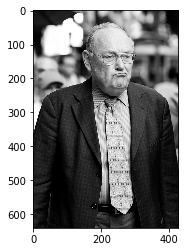

In [8]:
image_index = 2
image = images_2014.images[image_index]
plt.imshow(image.image_data.read_image())

In [9]:
smpl = batch_smpl.SMPL(os.path.join(DATA_DIR, "smpl-models", "model_neutral_np.pkl"))

TypeError: load() got an unexpected keyword argument 'encoding'

In [ ]:
dp_data = []
for image in images_2014.images:
    if image.people is not None:
        for person in image.people:
            if person.dp_data is not None:
                dp_data.append(person.dp_data)



In [ ]:
verts, joints, Rs = smpl(np.zeros((1,10), dtype='float32'), np.zeros((1,72), dtype='float32'), get_skin=True)
sess = tf.Session()
verts, joints, Rs = sess.run([verts, joints, Rs])
sess.close()

In [ ]:
renderer = SMPLRenderer(face_path=os.path.join(ROOT_DIR, "tf_smpl", "smpl_faces.npy"))

In [ ]:
r_verts = renderer(verts)

In [ ]:
Rs.shape

In [ ]:
verts.shape

In [2]:
ROOT_DIR 

'/data/AI/Mask_RCNN'

In [3]:
sys.path

['',
 '/usr/lib/python2.7',
 '/usr/lib/python2.7/plat-x86_64-linux-gnu',
 '/usr/lib/python2.7/lib-tk',
 '/usr/lib/python2.7/lib-old',
 '/usr/lib/python2.7/lib-dynload',
 '/usr/local/lib/python2.7/dist-packages',
 '/usr/local/lib/python2.7/dist-packages/pycocotools-2.0-py2.7-linux-x86_64.egg',
 '/usr/local/lib/python2.7/dist-packages',
 '/usr/lib/python2.7/dist-packages',
 '/usr/lib/python2.7/dist-packages/wx-3.0-gtk2',
 '/usr/local/lib/python2.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/data/AI/Mask_RCNN',
 '/data/AI/Mask_RCNN/samples/humans',
 '/data/AI/Mask_RCNN/opendr']

In [6]:
import smpl
